In [636]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [637]:
df = pd.read_csv('/Users/alikhansainov/Desktop/ds_salaries.csv')
df.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [638]:
#df.nunique()
#df.isna().sum()
#df.isnull().sum()
df.describe()


,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [639]:
df.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [640]:
df.shape

(607, 12)

In [641]:
df.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [642]:
df = df.assign(log_salary_in_usd=np.log1p(df['salary_in_usd']))
df = df.assign(log_salary=np.log1p(df['salary']))
df = df.drop('salary_in_usd', axis =1)
df = df.drop('salary', axis =1)
df.head(10)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size,log_salary_in_usd,log_salary
0,0,2020,MI,FT,Data Scientist,EUR,DE,0,DE,L,11.287705,11.156265
1,1,2020,SE,FT,Machine Learning Scientist,USD,JP,0,JP,S,12.468441,12.468441
2,2,2020,SE,FT,Big Data Engineer,GBP,GB,50,GB,M,11.599332,11.350418
3,3,2020,MI,FT,Product Data Analyst,USD,HN,0,HN,S,9.903538,9.903538
4,4,2020,SE,FT,Machine Learning Engineer,USD,US,50,US,L,11.918397,11.918397
5,5,2020,EN,FT,Data Analyst,USD,US,100,US,L,11.184435,11.184435
6,6,2020,SE,FT,Lead Data Scientist,USD,US,100,US,S,12.154785,12.154785
7,7,2020,MI,FT,Data Scientist,HUF,HU,50,HU,L,10.483914,16.213406
8,8,2020,MI,FT,Business Data Analyst,USD,US,100,US,L,11.813037,11.813037
9,9,2020,SE,FT,Lead Data Engineer,USD,NZ,50,NZ,S,11.736077,11.736077


In [643]:
numeric_columns = df[['Unnamed: 0', 'remote_ratio', 'log_salary_in_usd', 'log_salary']].columns

In [644]:
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())
missing = df[numeric_columns].isna().sum()
print (missing)

Unnamed: 0           0
remote_ratio         0
log_salary_in_usd    0
log_salary           0
dtype: int64


In [645]:
df[numeric_columns].corr()

,Unnamed: 0,remote_ratio,log_salary_in_usd,log_salary
Unnamed: 0,1.000000,0.095000,0.245580,0.003533
remote_ratio,0.095000,1.000000,0.143121,0.030278
log_salary_in_usd,0.245580,0.143121,1.000000,0.290412
log_salary,0.003533,0.030278,0.290412,1.000000


In [646]:
def get_redundant_pairs (df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range (0, df.shape[1]):
        for j in range (0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print ('Top Absolute Correlations')
print (get_top_abs_correlations(df[numeric_columns], 50))

Top Absolute Correlations
log_salary_in_usd  log_salary           0.290412
Unnamed: 0         log_salary_in_usd    0.245580
remote_ratio       log_salary_in_usd    0.143121
Unnamed: 0         remote_ratio         0.095000
remote_ratio       log_salary           0.030278
Unnamed: 0         log_salary           0.003533
dtype: float64


In [647]:
# def correlations(dataset, threshold):
#     col_corr = set()
#     corr_matrix = dataset.corr()
#     for i in range (len(corr_matrix.columns)):
#         for j in range(i):
#             if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j]):
#                 colname = corr_matrix.columns[i]
#                 col_corr.add(colname)
#                 if colname in dataset.columns:
#                     del dataset[colname]
# correlations(df, 0.9)

In [648]:
df[numeric_columns].var()

Unnamed: 0           30754.666667
remote_ratio          1657.233269
log_salary_in_usd        0.599266
log_salary               1.010039
dtype: float64

In [649]:
from sklearn.feature_selection import VarianceThreshold

cutter = VarianceThreshold(threshold=0.1)
cutter.fit(df[numeric_columns])
kept_features = cutter.get_feature_names_out()
constant_cols = [x for x in numeric_columns if x not in kept_features]
df_low_variance = df[constant_cols]
df_low_variance


""
0
1
2
3
4
...
602
603
604
605


In [650]:
df[numeric_columns].var()

Unnamed: 0           30754.666667
remote_ratio          1657.233269
log_salary_in_usd        0.599266
log_salary               1.010039
dtype: float64

In [651]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size,log_salary_in_usd,log_salary
0,0,2020,MI,FT,Data Scientist,EUR,DE,0,DE,L,11.287705,11.156265
1,1,2020,SE,FT,Machine Learning Scientist,USD,JP,0,JP,S,12.468441,12.468441
2,2,2020,SE,FT,Big Data Engineer,GBP,GB,50,GB,M,11.599332,11.350418
3,3,2020,MI,FT,Product Data Analyst,USD,HN,0,HN,S,9.903538,9.903538
4,4,2020,SE,FT,Machine Learning Engineer,USD,US,50,US,L,11.918397,11.918397
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,USD,US,100,US,M,11.944714,11.944714
603,603,2022,SE,FT,Data Engineer,USD,US,100,US,M,11.744045,11.744045
604,604,2022,SE,FT,Data Analyst,USD,US,0,US,M,11.767575,11.767575
605,605,2022,SE,FT,Data Analyst,USD,US,100,US,M,11.918397,11.918397


In [652]:
categorical_columns = df[['experience_level', 'employment_type','salary_currency','job_title','employee_residence','company_location','company_size', 'work_year']]

df.describe(include='object')
categorical_columns
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size,log_salary_in_usd,log_salary
0,0,2020,MI,FT,Data Scientist,EUR,DE,0,DE,L,11.287705,11.156265
1,1,2020,SE,FT,Machine Learning Scientist,USD,JP,0,JP,S,12.468441,12.468441
2,2,2020,SE,FT,Big Data Engineer,GBP,GB,50,GB,M,11.599332,11.350418
3,3,2020,MI,FT,Product Data Analyst,USD,HN,0,HN,S,9.903538,9.903538
4,4,2020,SE,FT,Machine Learning Engineer,USD,US,50,US,L,11.918397,11.918397
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,USD,US,100,US,M,11.944714,11.944714
603,603,2022,SE,FT,Data Engineer,USD,US,100,US,M,11.744045,11.744045
604,604,2022,SE,FT,Data Analyst,USD,US,0,US,M,11.767575,11.767575
605,605,2022,SE,FT,Data Analyst,USD,US,100,US,M,11.918397,11.918397


In [653]:
# счетчики 
for col in categorical_columns:
    if col != 'work_year':
        if df[col].nunique() < 2:
            one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True)
            df = pd.concat((df.drop(col, axis=1), one_hot), axis=1)
        else:
            mean_target = df.groupby(col)['log_salary_in_usd'].mean()
            df[col] = df[col].map(mean_target)
df
        

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size,log_salary_in_usd,log_salary
0,0,2020,11.136817,11.42415,11.351508,10.982704,11.240060,0,11.188124,11.436993,11.287705,11.156265
1,1,2020,11.744346,11.42415,11.719279,11.668180,11.323585,0,11.444739,10.926382,12.468441,12.468441
2,2,2020,11.744346,11.42415,10.450111,11.245866,11.241398,50,11.245355,11.493301,11.599332,11.350418
3,3,2020,11.136817,11.42415,9.307573,11.668180,9.903538,0,9.903538,10.926382,9.903538,9.903538
4,4,2020,11.744346,11.42415,11.350402,11.668180,11.826874,50,11.763962,11.436993,11.918397,11.918397
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,11.744346,11.42415,11.467396,11.668180,11.826874,100,11.763962,11.493301,11.944714,11.944714
603,603,2022,11.744346,11.42415,11.467396,11.668180,11.826874,100,11.763962,11.493301,11.744045,11.744045
604,604,2022,11.744346,11.42415,11.299194,11.668180,11.826874,0,11.763962,11.493301,11.767575,11.767575
605,605,2022,11.744346,11.42415,11.299194,11.668180,11.826874,100,11.763962,11.493301,11.918397,11.918397


In [654]:
df['work_year'] = pd.to_datetime(df['work_year']).dt.year
df



,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size,log_salary_in_usd,log_salary
0,0,1970,11.136817,11.42415,11.351508,10.982704,11.240060,0,11.188124,11.436993,11.287705,11.156265
1,1,1970,11.744346,11.42415,11.719279,11.668180,11.323585,0,11.444739,10.926382,12.468441,12.468441
2,2,1970,11.744346,11.42415,10.450111,11.245866,11.241398,50,11.245355,11.493301,11.599332,11.350418
3,3,1970,11.136817,11.42415,9.307573,11.668180,9.903538,0,9.903538,10.926382,9.903538,9.903538
4,4,1970,11.744346,11.42415,11.350402,11.668180,11.826874,50,11.763962,11.436993,11.918397,11.918397
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,1970,11.744346,11.42415,11.467396,11.668180,11.826874,100,11.763962,11.493301,11.944714,11.944714
603,603,1970,11.744346,11.42415,11.467396,11.668180,11.826874,100,11.763962,11.493301,11.744045,11.744045
604,604,1970,11.744346,11.42415,11.299194,11.668180,11.826874,0,11.763962,11.493301,11.767575,11.767575
605,605,1970,11.744346,11.42415,11.299194,11.668180,11.826874,100,11.763962,11.493301,11.918397,11.918397


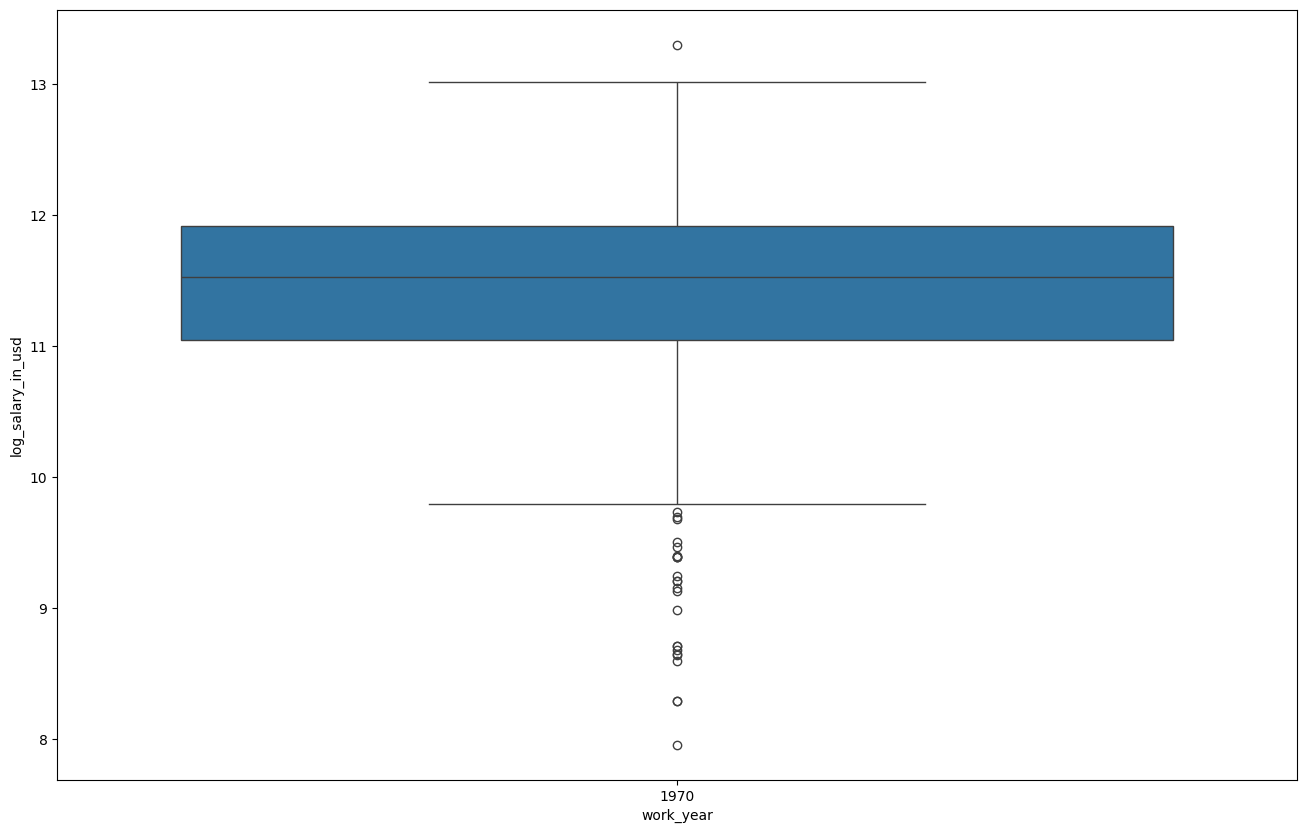

In [655]:
fig = plt.figure()
fig.set_size_inches((16,10))
sns.boxplot(y='log_salary_in_usd', x=df['work_year'].astype('category'), data=df)
plt.show()

<Axes: xlabel='company_location', ylabel='log_salary_in_usd'>

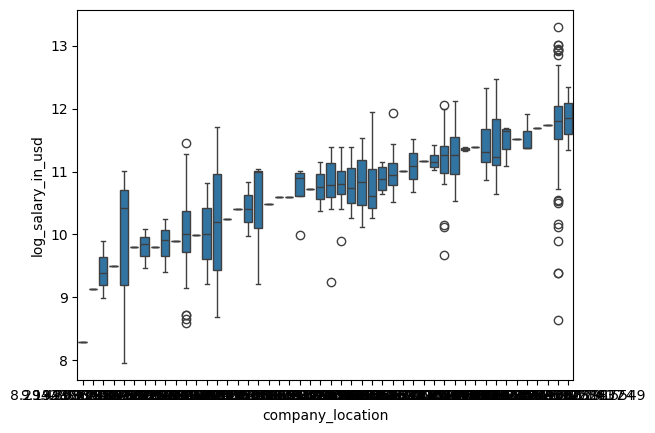

In [656]:
sns.boxplot(y='log_salary_in_usd', x=df['company_location'].astype('category'), data=df)
# sns.boxplot(y='log_salary_in_usd', x=df['salary_currency'].astype('category'), data=df)

In [657]:
from sklearn.feature_selection import SequentialFeatureSelector
model = LinearRegression()
X = df.drop('log_salary_in_usd',axis=1)
X = df.drop('log_salary',axis=1)
y = df['log_salary_in_usd']
sfs = SequentialFeatureSelector(model, n_features_to_select=6)
sfs.fit(X,y)
selected_features = sfs.get_feature_names_out()
X = X[selected_features]
X


,Unnamed: 0,work_year,experience_level,employment_type,job_title,log_salary_in_usd
0,0,1970,11.136817,11.42415,11.351508,11.287705
1,1,1970,11.744346,11.42415,11.719279,12.468441
2,2,1970,11.744346,11.42415,10.450111,11.599332
3,3,1970,11.136817,11.42415,9.307573,9.903538
4,4,1970,11.744346,11.42415,11.350402,11.918397
...,...,...,...,...,...,...
602,602,1970,11.744346,11.42415,11.467396,11.944714
603,603,1970,11.744346,11.42415,11.467396,11.744045
604,604,1970,11.744346,11.42415,11.299194,11.767575
605,605,1970,11.744346,11.42415,11.299194,11.918397


In [658]:
from sklearn.model_selection import TimeSeriesSplit

from sklearn.model_selection import KFold
splitter = TimeSeriesSplit(n_splits=4)
test_losses = []
train_losses = []

for train_index, test_index in splitter.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds_test = model.predict(X_test)
    preds_train = model.predict(X_train)
    error_test = np.mean((preds_test -  y_test) ** 2)
    error_train = np.mean((preds_train -  y_train) ** 2)

    test_losses.append(error_test)
    train_losses.append(error_train)
print (np.mean(test_losses))
print (np.mean(train_losses))

3.460920716126835e-26
5.2539215480922174e-27


In [659]:
from sklearn.model_selection import cross_validate
model = LinearRegression()
cv_result = cross_validate(model, X, y, scoring='neg_mean_squared_error', cv=splitter, return_train_score=True)
cv_result

{'fit_time': array([0.00159907, 0.00135899, 0.00096083, 0.00101471]),
 'score_time': array([0.00061679, 0.00057602, 0.00050306, 0.00044513]),
 'test_score': array([-1.95179183e-27, -1.18972559e-25, -1.93311343e-26, -3.09728958e-28]),
 'train_score': array([-1.46176567e-28, -1.70092152e-26, -3.56678379e-27, -6.83354817e-29])}

In [660]:
from sklearn.linear_model import Lasso, Ridge
model_lasso = Lasso(max_iter=100000)
cv_result_lasso = cross_validate(model_lasso, X, y, scoring='neg_mean_squared_error', cv=splitter, return_train_score=True)

# Note the correction in the scoring parameter above
print(-np.mean(cv_result_lasso['train_score']))
print(-np.mean(cv_result_lasso['test_score']))

0.7425129484694368
0.551378207892923


0      11.287705
1      12.468441
2      11.599332
3       9.903538
4      11.918397
         ...    
602    11.944714
603    11.744045
604    11.767575
605    11.918397
606    12.206078
Name: log_salary_in_usd, Length: 607, dtype: float64

In [666]:
high_end = df['log_salary_in_usd'].quantile(0.995)
low_end = df['log_salary_in_usd'].quantile(0.005)
print (high_end)
print (low_end)

12.95462921572166
8.597465436036767
